In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pyFTS.benchmarks import Measures
import math
from pyFTS.common import Util
import datetime
import statistics
from sklearn.preprocessing import MinMaxScaler

In [47]:
df = pd.read_csv('/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv')
data = df.drop(labels=['rv1','rv2'], axis=1)

In [48]:
# from pandas.tseries.offsets import BDay
# data['Date'] = pd.to_datetime(data['date'])
# data.index= data['date']

In [49]:
data.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2


In [50]:
data['Appliances']

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

In [51]:
data_scaler = data.loc[:,'lights':'Tdewpoint']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_scaler)
df_scaled = pd.DataFrame(scaled, columns=list(data_scaler.columns))
df_scaled['Appliances'] = data['Appliances']
df_scaled['Date'] = pd.to_datetime(data['date'])
df_scaled.index= data['date']
data = df_scaled
data

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Date
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,60,2016-01-11 17:00:00
2016-01-11 17:10:00,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,60,2016-01-11 17:10:00
2016-01-11 17:20:00,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,50,2016-01-11 17:20:00
2016-01-11 17:30:00,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,50,2016-01-11 17:30:00
2016-01-11 17:40:00,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,60,2016-01-11 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,0.000000,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,100,2016-05-27 17:20:00
2016-05-27 17:30:00,0.000000,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,90,2016-05-27 17:30:00
2016-05-27 17:40:00,0.142857,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,270,2016-05-27 17:40:00


Text(0.5, 1.0, 'Appliances Energy Consumption')

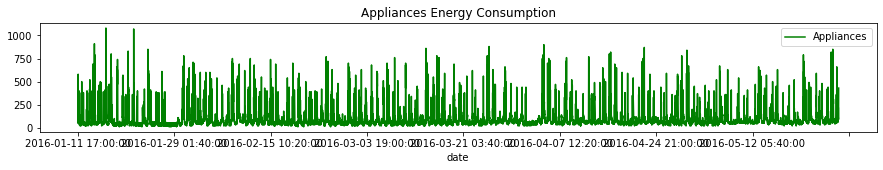

In [52]:
data['Appliances'].plot(color='green', figsize=(15,2))
plt.legend([ 'Appliances'])
plt.title("Appliances Energy Consumption")

In [53]:
data.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Appliances', 'Date'],
      dtype='object')

In [54]:
#Variables
endog = data['Appliances']
exog = data.loc[:,'lights':'Tdewpoint']

In [55]:
train_size=int(len(data) *0.75)
test_size = int(len(data)) - train_size
print(test_size)

4934


In [56]:
train_X, train_y = exog[:train_size].dropna(), endog[:train_size].dropna()
test_X, test_y = exog[train_size:].dropna(), endog[train_size:].dropna()

In [57]:
test_X.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [58]:
y_test=endog[:train_size].dropna()
y_test

date
2016-01-11 17:00:00     60
2016-01-11 17:10:00     60
2016-01-11 17:20:00     50
2016-01-11 17:30:00     50
2016-01-11 17:40:00     60
                      ... 
2016-04-23 11:00:00    370
2016-04-23 11:10:00    400
2016-04-23 11:20:00    300
2016-04-23 11:30:00    300
2016-04-23 11:40:00    280
Name: Appliances, Length: 14801, dtype: int64

In [59]:
test_y

date
2016-04-23 11:50:00    280
2016-04-23 12:00:00    320
2016-04-23 12:10:00    360
2016-04-23 12:20:00    210
2016-04-23 12:30:00     90
                      ... 
2016-05-27 17:20:00    100
2016-05-27 17:30:00     90
2016-05-27 17:40:00    270
2016-05-27 17:50:00    420
2016-05-27 18:00:00    430
Name: Appliances, Length: 4934, dtype: int64

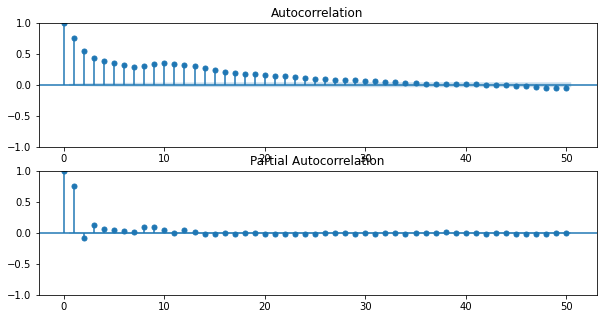

In [60]:
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [48]:
# from pmdarima.arima import auto_arima
# step_wise=auto_arima(train_y, 
#  exogenous= train_X,
#  start_p=1, start_q=1, 
#  max_p=3, max_q=3, 
#  d=1, max_d=4,
#  trace=True, 
#  error_action='ignore', 
#  suppress_warnings=True, 
#  stepwise=True,
#  seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=167391.791, Time=109.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=168599.649, Time=3.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=168485.472, Time=81.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=168405.124, Time=110.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=168597.651, Time=48.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=167301.083, Time=125.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=167873.103, Time=123.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=167423.274, Time=137.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=167280.466, Time=127.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=167277.516, Time=123.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=167494.445, Time=128.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=157.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=167329.847, Time=142.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=167283.804, Time

In [49]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14801
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -83594.917
Date:                Tue, 15 Jun 2021   AIC                         167251.834
Time:                        01:06:42   BIC                         167487.508
Sample:                    01-11-2016   HQIC                        167330.079
                         - 04-23-2016                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
lights          0.7047      0.077      9.125      0.000       0.553       0.856
T1             -6.5566      8.666     -0.757      0.449     -23.542      10.429
RH_1          -11.5575      0.679    -17.031      0.000     -12.888     -10.227
T2             25.3529      5.502      4.608      0.000      14.569      36.137
RH_2            1.7864      1.335      1.338      0.181      -0.831       4.404
T3            -94.6975      5.944    -15.931      0.000    -106.348     -83.047
RH_3          -11.1834      1.838     -6.085      0.000     -14.786      -7.581
T4            -46.5816      3.718    -12.528      0.000     -53.869     -39.294
RH_4            8.8240      2.065      4.274      0.000       4.777      12.871
T5              6.0426      4.967      1.217      0.224      -3.693      15.778
RH_5            0.2200      0.269      0.819      0.413      -0.306       0.746
T6              0.3549      2.376      0.149      0.881      -4.302       5.012
RH_6           -0.5778      0.351     -1.647      0.100      -1.265       0.110
T7              6.2702      8.470      0.740      0.459     -10.331      22.871
RH_7            0.2517      2.051      0.123      0.902      -3.768       4.271
T8              9.3839      6.800      1.380      0.168      -3.944      22.712
RH_8            5.8569      2.031      2.884      0.004       1.876       9.838
T9             15.5989     11.033      1.414      0.157      -6.025      37.223
RH_9           -9.1388      1.934     -4.726      0.000     -12.929      -5.348
T_out          -1.6385     10.714     -0.153      0.878     -22.638      19.361
Press_mm_hg    -1.0610      2.341     -0.453      0.650      -5.649       3.527
RH_out         -2.8251      2.068     -1.366      0.172      -6.878       1.228
Windspeed      -3.4576      1.859     -1.860      0.063      -7.101       0.186
Visibility      0.4392      0.180      2.434      0.015       0.086       0.793
Tdewpoint       7.5262     10.230      0.736      0.462     -12.524      27.576
ar.L1           1.4642      0.023     64.435      0.000       1.420       1.509
ar.L2          -0.6413      0.018    -36.252      0.000      -0.676      -0.607
ar.L3           0.1414      0.005     26.683      0.000       0.131       0.152
ma.L1          -1.6509      0.023    -72.530      0.000      -1.696      -1.606
ma.L2           0.6580      0.021     30.730      0.000       0.616       0.700
sigma2       4621.0436     19.096    241.986      0.000    4583.615    4658.472
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):            265207.33
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             2.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.97
===================================================================================

Warnings:
[1] Co

In [25]:
# import statsmodels.api as sm
# import itertools
# # Grid Search
# p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
# pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
# p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's
# pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
# s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
# pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
# combs = {}
# aics = []
# # Grid Search Continued
# for combination in pdq:
#     for seasonal_combination in pdqs2:
#         try:
#             model = sm.tsa.statespace.SARIMAX(data, order=combination, seasonal_order=seasonal_combination,
#                                              enforce_stationarity=False,
#                                              enforce_invertibility=False)
#             model = model.fit()
#             combs.update({model.aic : [combination, seasonal_combination]})
#             aics.append(model.aic)
            
#         except:
#             continue
            
# best_aic = min(aics)
# # Modeling and forcasting
# model = sm.tsa.statespace.SARIMAX(train_y, exog = train_X, order=combs[best_aic][0], seasonal_order=combs[best_aic][1],
#                                              enforce_stationarity=False,
#                                              enforce_invertibility=False)
# model = model.fit()
# model.forecast(7)

In [36]:
# import itertools 
# from sklearn.metrics import mean_squared_error
# p = q = range(7,8) 
# pdq = list(itertools.product(p, [1], q)) 
# sp = sq = range(1,8)
# #range(0,1) <- ARIMAX 
# seasonal_pdq = list(itertools.product(sp, [0,1], sq,[1]))
# #rlist(itertools.product(sp, [0], sq,[0])) <- ARIMAX
# params = [] 
# params_s = [] 
# aics = [] 
# mses = [] 
# cnt = 0 

# for param in pdq: 
#     for param_seasonal in seasonal_pdq:
#         try:
#                 mod = sm.tsa.statespace.SARIMAX(train_y,
#                                                 order=param,
#                                                 exog = train_X,
#                                                 seasonal_order=param_seasonal,
#                                                 freq='D',
#                                                 enforce_stationarity=False,
#                                                 enforce_invertibility=False)

#                 results = mod.fit()

#                 pred = results.get_prediction(start = pd.to_datetime(tr_end),
#                                           end = pd.to_datetime(te_end),exog=exog_test)

#                 params.append(param)
#                 params_s.append(param_seasonal)
#                 aics.append(results.aic)
#                 mses.append(mean_squared_error(tes,pred.predicted_mean[1:]))


#                 #if cnt % 8 == 0:
#                 print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param,
#                                                                 param_seasonal,
#                                                                 results.aic,
#                                                             mses[-1]))
#                     #cnt += 1

#         except:
#               continue

# min_ind = aics.index(min(aics)) 
# bestparam = (params[min_ind],params_s[min_ind]) 
# print('best_param_aic:',bestparam,' aic:',min(aics)) 
# min_ind = mses.index(min(mses)) 
# bestparam = (params[min_ind],params_s[min_ind]) 
# print('best_param_mse:',bestparam,' mse:',min(mses))

# print('Finish!!')

In [61]:
train_y

date
2016-01-11 17:00:00     60
2016-01-11 17:10:00     60
2016-01-11 17:20:00     50
2016-01-11 17:30:00     50
2016-01-11 17:40:00     60
                      ... 
2016-04-23 11:00:00    370
2016-04-23 11:10:00    400
2016-04-23 11:20:00    300
2016-04-23 11:30:00    300
2016-04-23 11:40:00    280
Name: Appliances, Length: 14801, dtype: int64

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=(3, 1, 2),
 seasonal_order=(0,0,0,0),
 enforce_invertibility=False, 
 enforce_stationarity=False)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


In [64]:
results = model.fit()

In [79]:
#test_X

In [66]:
steps = -1
predictions = results.predict(start=train_size, end=train_size+test_size+(steps),exog=test_X)
predictions

2016-04-23 11:50:00    258.285151
2016-04-23 12:00:00    206.861887
2016-04-23 12:10:00    162.332545
2016-04-23 12:20:00    125.198393
2016-04-23 12:30:00     63.998396
                          ...    
2016-05-27 17:20:00   -192.441420
2016-05-27 17:30:00   -192.101642
2016-05-27 17:40:00   -197.816113
2016-05-27 17:50:00   -196.545537
2016-05-27 18:00:00   -179.198841
Freq: 10T, Name: predicted_mean, Length: 4934, dtype: float64

In [67]:
forecast = results.forecast(steps=test_size, exog=test_X)
forecast

2016-04-23 11:50:00    258.285151
2016-04-23 12:00:00    206.861887
2016-04-23 12:10:00    162.332545
2016-04-23 12:20:00    125.198393
2016-04-23 12:30:00     63.998396
                          ...    
2016-05-27 17:20:00   -192.441420
2016-05-27 17:30:00   -192.101642
2016-05-27 17:40:00   -197.816113
2016-05-27 17:50:00   -196.545537
2016-05-27 18:00:00   -179.198841
Freq: 10T, Name: predicted_mean, Length: 4934, dtype: float64

In [68]:
test_X.iloc[1:len(test_X)].index

Index(['2016-04-23 12:00:00', '2016-04-23 12:10:00', '2016-04-23 12:20:00',
       '2016-04-23 12:30:00', '2016-04-23 12:40:00', '2016-04-23 12:50:00',
       '2016-04-23 13:00:00', '2016-04-23 13:10:00', '2016-04-23 13:20:00',
       '2016-04-23 13:30:00',
       ...
       '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
       '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
       '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
       '2016-05-27 18:00:00'],
      dtype='object', name='date', length=4933)

In [71]:
act = pd.DataFrame(data)
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Appliances'] = act['Appliances']
predictions.rename(columns={0:'Prediction'}, inplace=True)
predictions

,predicted_mean,Appliances
date,,
2016-04-23 11:50:00,258.285151,280
2016-04-23 12:00:00,206.861887,320
2016-04-23 12:10:00,162.332545,360
2016-04-23 12:20:00,125.198393,210
2016-04-23 12:30:00,63.998396,90
...,...,...
2016-05-27 17:20:00,-192.441420,100
2016-05-27 17:30:00,-192.101642,90
2016-05-27 17:40:00,-197.816113,270


<AxesSubplot:xlabel='date'>

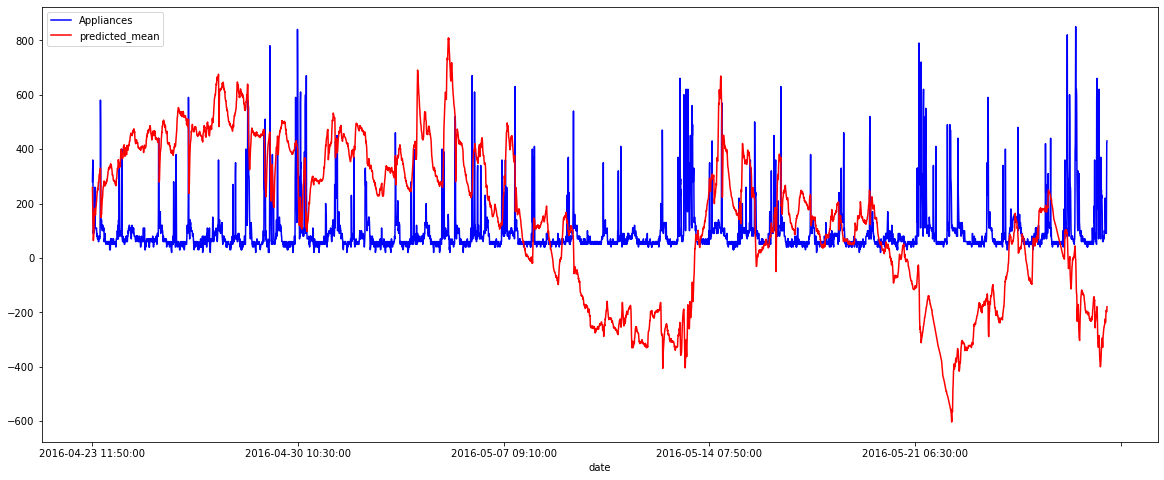

In [72]:
predictions['Appliances'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

In [73]:
# forecast = pd.DataFrame(forecast)
# forecast.reset_index(drop=True, inplace=True)
# forecast.index=test_X.index
# forecast.rename(columns={0:'Forecast'}, inplace=True)
# forecast

In [74]:
# forecast['predicted_mean'].plot(legend=True)
# forecast['Actual'].plot(legend=True)

In [75]:
#predictions #predicted_mean

In [76]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['predicted_mean'], predictions['Appliances'])
error

299.90095232944327